Part 1. Convolutional Neural Networks in Keras
--------------------
Implement and **RUN** a CNN in Keras using convolutional layers, dense layers, dropout, max pooling.


The inputs are 32x32 images passed as standard three-channel color so the shape of the inputs is [32, 32, 3]. Create a CNN that achieves greater than 75% validation accuracy.


Here are some components to get you started. Plot your training and validation accuracies and report the final validation accuracy score.
The portions you will complete can be located with “TO DO”.

In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
# CNN model specification

'''
TO DO: Define your CNN model here with convolutional layers, dense layers, dropout, max pooling

'''
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# CNN model training

'''
Run the training prompt below. Feel free to modify the training pipeline
Batch size might need some tuning depending on your architecture, but 64 was found to be good for a large CNN
'''

epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# Fit the model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

Part 2. Recurrent Neural Networks in PyTorch
--------------------
Implement and **RUN** a RNN in PyTorch.

Download and unzip this [folder](https://download.pytorch.org/tutorial/data.zip) to your current directory.

Define a RNN architecture to be used in this code block for character-by-character analysis of names to predict nationality of the individual.

The portions you will complete can be located with “TO DO”.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path):
  return glob.glob(path)

# change this to your current directory path if you need
print(findFiles('/content/drive/MyDrive/data/names/*.txt'))
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('/content/drive/MyDrive/data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['/content/drive/MyDrive/data/names/Russian.txt', '/content/drive/MyDrive/data/names/Japanese.txt', '/content/drive/MyDrive/data/names/Chinese.txt', '/content/drive/MyDrive/data/names/German.txt', '/content/drive/MyDrive/data/names/Vietnamese.txt', '/content/drive/MyDrive/data/names/Arabic.txt', '/content/drive/MyDrive/data/names/Italian.txt', '/content/drive/MyDrive/data/names/Dutch.txt', '/content/drive/MyDrive/data/names/Polish.txt', '/content/drive/MyDrive/data/names/Greek.txt', '/content/drive/MyDrive/data/names/Scottish.txt', '/content/drive/MyDrive/data/names/Portuguese.txt', '/content/drive/MyDrive/data/names/Korean.txt', '/content/drive/MyDrive/data/names/Irish.txt', '/content/drive/MyDrive/data/names/English.txt', '/content/drive/MyDrive/data/names/French.txt', '/content/drive/MyDrive/data/names/Spanish.txt', '/content/drive/MyDrive/data/names/Czech.txt']
Slusarski


In [ ]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [ ]:
# Turning names into tensors

import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


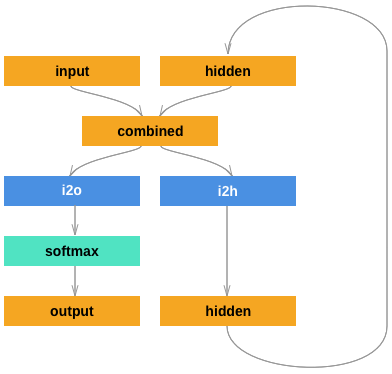

In [ ]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        '''
        TO DO:
        Define your layers and activation function here, according to the recommended architecture above.
        Hint: you only need to define the blue (LINEAR) and green (ACTIVATION) layers
        '''
        self.hidden_input = nn.Linear(input_size + hidden_size, hidden_size) 
        self.input_to_output = nn.Linear(input_size + hidden_size, output_size) 
        self.softmax = nn.LogSoftmax(dim = 1)

    def forward(self, input, hidden):
        '''
        TO DO:
        Define your forward pass.
        Hint: follow the arrows.
        '''
        combined = torch.cat((input, hidden), 1) 
        hidden = self.hidden_input(combined) 
        output = self.input_to_output(combined) 
        output = self.softmax(output)
  
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

To run a step of this network we need to pass an input (in our case, the Tensor for the current letter) and a previous hidden state (which we initialize as zeros at first). We’ll get back the output (probability of each language) and a next hidden state (which we keep for the next step).

In [ ]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

For the sake of efficiency we don’t want to be creating a new Tensor for every step, so we will use lineToTensor instead of letterToTensor and use slices. This could be further optimized by pre-computing batches of Tensors.

In [ ]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.7926, -3.0065, -3.0064, -2.7814, -2.8629, -2.9280, -2.9544, -2.8945,
         -2.7883, -2.8793, -2.9385, -2.8747, -2.8443, -2.8562, -2.9143, -2.8646,
         -2.9466, -2.9319]], grad_fn=<LogSoftmaxBackward0>)


In [ ]:
# Helper functions

'''
Here we interpret the output of the network, which we know to be a likelihood of each category.
We can use Tensor.topk to get the index of the greatest value
'''

def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))


'''
Quickly get training example
'''
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

('German', 3)
category = Vietnamese / line = Thai
category = Irish / line = Kelly
category = Irish / line = Milligan
category = Italian / line = Raneri
category = German / line = Hermann
category = Polish / line = Jagoda
category = Italian / line = Boerio
category = Korean / line = Seo
category = Dutch / line = Romijn
category = Portuguese / line = Ramires


In [ ]:
'''
TO DO:
Define your loss function based on the activation layer of your RNN
'''
criterion = nn.NLLLoss()

In [ ]:
# Training block

learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()


import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 5s) 2.5838 Uhlik / Czech ✓
10000 10% (0m 11s) 1.6704 Moy / Korean ✗ (Chinese)
15000 15% (0m 17s) 2.1040 Fojtikova / Spanish ✗ (Czech)
20000 20% (0m 23s) 1.5320 Seelen / Dutch ✓
25000 25% (0m 29s) 3.1287 Denis / Greek ✗ (French)
30000 30% (0m 35s) 1.1709 Palmeiro / Portuguese ✓
35000 35% (0m 41s) 1.2249 Cao / Chinese ✗ (Vietnamese)
40000 40% (0m 47s) 2.1003 Jefferson / Scottish ✗ (English)
45000 45% (0m 53s) 0.5902 Riagain / Irish ✓
50000 50% (0m 59s) 2.1388 Cino / Chinese ✗ (Italian)
55000 55% (1m 4s) 0.2441 Faucheux / French ✓
60000 60% (1m 10s) 2.8976 Richard / Scottish ✗ (German)
65000 65% (1m 16s) 0.9607 Kohler / German ✓
70000 70% (1m 22s) 2.3521 Parnaby / Irish ✗ (English)
75000 75% (1m 28s) 1.3372 Okui / Korean ✗ (Japanese)
80000 80% (1m 34s) 5.5891 Boulos / Greek ✗ (Arabic)
85000 85% (1m 40s) 1.4547 Lauwers / Dutch ✓
90000 90% (1m 46s) 0.7922 Sada / Japanese ✓
95000 95% (1m 52s) 1.9294 Wilchek / English ✗ (Czech)
100000 100% (1m 58s) 2.6039 Altshuller / German ✗ (Ru

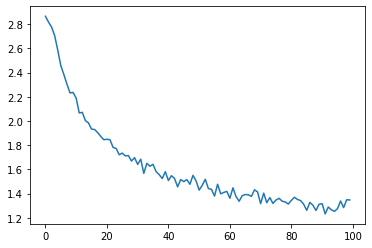

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

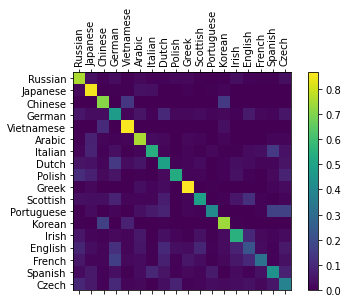

In [ ]:
# Evaluating the results

# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [ ]:
# Test it yourself

def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dostoevsky')
predict('Martineau')
predict('Papadimitriou')


> Dostoevsky
(-0.05) Russian
(-3.19) Czech
(-6.22) Greek

> Martineau
(-1.71) Japanese
(-1.84) Czech
(-2.10) French

> Papadimitriou
(-0.34) Greek
(-1.53) Russian
(-3.89) Japanese


Part 3. Graph Neural Networks in DGL
--------------------

Adapt from Tutorial 4 on the DGL library for Graph Neural Networks to a new dataset: CORA (refer to documentation [here](https://relational.fit.cvut.cz/dataset/CORA)). Your goal is to classify the nodes in this research paper dataset.

Fill in the TO DO parts where the code is missing, to define your GNN architecture. This requires you to reason about the dimensionality of the features and labels in this problem.

In [ ]:
!pip install dgl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import dgl
import dgl.function as fn
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from dgl import DGLGraph

gcn_msg = fn.copy_u(u='h', out='m')
gcn_reduce = fn.sum(msg='m', out='h')

In [ ]:
class GCNLayer(nn.Module):
    def __init__(self, in_feats, out_feats):
        super(GCNLayer, self).__init__()
        """
        TO DO:
        Define a single Linear layer here
        """
        self.linear = nn.Linear(in_feats, out_feats)

    def forward(self, g, feature):
        # Creating a local scope so that all the stored ndata and edata
        # (such as the `'h'` ndata below) are automatically popped out
        # when the scope exits.
        with g.local_scope():
            """
            TO DO:
            Define the forward pass to pass and accummulate messages
            """
            g.ndata["h"] = feature
            g.update_all(gcn_msg, gcn_reduce)
            h = g.ndata["h"]
            return self.linear(h)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        """
        Define 2 layers of the GCNLayer type you just coded above.
        Refer to the documentation of the CORA dataset (https://relational.fit.cvut.cz/dataset/CORA):
        what should be the input dimension of each node's vector?
        what should be the final output dimension for this classification task?
        """
        self.layer1 = GCNLayer(1433, 16)
        self.layer2 = GCNLayer(16, 7)
    
    def forward(self, g, features):
        """
        Define your forward pass with a ReLU activation between the 2 layers
        """
        x = F.relu(self.layer1(g, features))
        x = self.layer2(g, x)
        return x

net = Net()
print(net)

Net(
  (layer1): GCNLayer(
    (linear): Linear(in_features=1433, out_features=16, bias=True)
  )
  (layer2): GCNLayer(
    (linear): Linear(in_features=16, out_features=7, bias=True)
  )
)


In [ ]:
# CORA dataset (https://relational.fit.cvut.cz/dataset/CORA)

from dgl.data import CoraGraphDataset
def load_cora_data():
    dataset = CoraGraphDataset()
    g = dataset[0]
    features = g.ndata['feat']
    labels = g.ndata['label']
    train_mask = g.ndata['train_mask']
    test_mask = g.ndata['test_mask']
    return g, features, labels, train_mask, test_mask

# Helper function to evaluate performance

def evaluate(model, g, features, labels, mask):
  model.eval()
  with th.no_grad():
      logits = model(g, features)
      logits = logits[mask]
      labels = labels[mask]
      _, indices = th.max(logits, dim=1)
      correct = th.sum(indices == labels)
      return correct.item() * 1.0 / len(labels)

If your code above is correct, when you run the training loop below you should see loss decrease, and test accuracy increase.

In [ ]:
# Training loop

import time
import numpy as np
g, features, labels, train_mask, test_mask = load_cora_data()
# Add edges between each node and itself to preserve old node representations
g.add_edges(g.nodes(), g.nodes())
optimizer = th.optim.Adam(net.parameters(), lr=1e-2)
dur = []
for epoch in range(50):
    if epoch >=3:
        t0 = time.time()

    net.train()
    logits = net(g, features)
    logp = F.log_softmax(logits, 1)
    loss = F.nll_loss(logp[train_mask], labels[train_mask])
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch >=3:
        dur.append(time.time() - t0)
    
    acc = evaluate(net, g, features, labels, test_mask)
    print("Epoch {:05d} | Loss {:.4f} | Test Acc {:.4f} | Time(s) {:.4f}".format(
            epoch, loss.item(), acc, np.mean(dur)))

  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.
Epoch 00000 | Loss 1.9491 | Test Acc 0.2820 | Time(s) nan
Epoch 00001 | Loss 1.7914 | Test Acc 0.3940 | Time(s) nan
Epoch 00002 | Loss 1.6712 | Test Acc 0.4590 | Time(s) nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 00003 | Loss 1.5688 | Test Acc 0.5230 | Time(s) 0.0336
Epoch 00004 | Loss 1.4772 | Test Acc 0.5430 | Time(s) 0.0339
Epoch 00005 | Loss 1.3927 | Test Acc 0.5660 | Time(s) 0.0339
Epoch 00006 | Loss 1.3071 | Test Acc 0.6090 | Time(s) 0.0352
Epoch 00007 | Loss 1.2183 | Test Acc 0.6540 | Time(s) 0.0438
Epoch 00008 | Loss 1.1277 | Test Acc 0.6800 | Time(s) 0.0504
Epoch 00009 | Loss 1.0390 | Test Acc 0.7110 | Time(s) 0.0524
Epoch 00010 | Loss 0.9560 | Test Acc 0.7140 | Time(s) 0.0542
Epoch 00011 | Loss 0.8821 | Test Acc 0.7210 | Time(s) 0.0545
Epoch 00012 | Loss 0.8156 | Test Acc 0.7120 | Time(s) 0.0523
Epoch 00013 | Loss 0.7539 | Test Acc 0.7120 | Time(s) 0.0502
Epoch 00014 | Loss 0.6947 | Test Acc 0.7130 | Time(s) 0.0490
Epoch 00015 | Loss 0.6369 | Test Acc 0.7130 | Time(s) 0.0491
Epoch 00016 | Loss 0.5837 | Test Acc 0.7180 | Time(s) 0.0483
Epoch 00017 | Loss 0.5366 | Test Acc 0.7180 | Time(s) 0.0475
Epoch 00018 | Loss 0.4941 | Test Acc 0.7200 | Time(s) 0.0464
Epoch 00019 | Loss 0.454

Mathematically, the GCN model follows this formula:

$H^{(l+1)} = \sigma(\tilde{D}^{-\frac{1}{2}}\tilde{A}\tilde{D}^{-\frac{1}{2}}H^{(l)}W^{(l)})$

Here, $H^{(l)}$ denotes the $l^{th}$ layer in the network,
$\sigma$ is the non-linearity, and $W$ is the weight matrix for
this layer. $\tilde{D}$ and $\tilde{A}$ are separately the degree
and adjacency matrices for the graph. With the superscript ~, we are referring
to the variant where we add additional edges between each node and itself to
preserve its old representation in graph convolutions. The shape of the input
$H^{(0)}$ is $N \times D$, where $N$ is the number of nodes
and $D$ is the number of input features. We can chain up multiple
layers as such to produce a node-level representation output with shape
$N \times F$, where $F$ is the dimension of the output node
feature vector.